<a href="https://colab.research.google.com/github/Ryong1998/snowball/blob/main/2_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. 초기 데이터 수집 보고서

## 1-1. DART 재무제표 데이터 수집

### 1-1-1. 파일 다운로드 방법

1. https://dart.fss.or.kr/ 전자공시시스템 사이트 접속
2. OpenDART(위쪽 메뉴) -> 재무정보일괄다운로드(좌측 메뉴) 선택
3. 2015~2022년 재무상태표, 손익계산서, 현금흐름표를 클릭하여 파일들 다운로드
4. 해당 파일들은 zip 파일로 되어 있어서 압축해제 실행
5. 압축 해제한 파일은 'data > Finance_report_txt' 폴더에 저장

### 1-1-2. 저장한 파일 정리

1. 저장한 파일들에서 PL은 손익계산서를, BS는 재무상태표를, CF는 현금흐름표를 의미함
2. Q는 분기를 의미함(1Q는 1분기, 2Q는 2분기)
3. 'Finance_report_txt' 폴더에 있는 각 파일들에 접근하기 위해서는 폴더들을 여러번 왔다갔다 해야 함으로, 파일명을 알기 쉽게 변경해서 손익계산서 파일들은 'PL_report_txt'폴더에, 재무상태표 파일들은 'BS_report_txt'폴더에 복사
4. 'PL_report_txt'에 있는 파일들 중 '_1'은 '손익계산서-별도재무제표', '_2'는 '손익계산서-연결재무제표', '_3'은 '포괄손익계산서-별도재무제표', '_4'는 '포괄손익계산서-연결재무제표' 를 뜻함
5. 'BS_report_txt'에 있는 파일들 중 '_1'은 '재무상태표-별도재무제표', '_2'는 '재무상태표-연결재무제표'를 뜻함


## 1-2. 금융지주회사 재무제표 데이터 수집

1. https://fisis.fss.or.kr/fss/fsiview/indexw.html 금융통계정보시스템 사이트 접속
2. '경영정보(위쪽 메뉴) -> 단순 통계표 조회(하위 메뉴)' 선택
3. '금융지주회사(왼쪽 메뉴) -> 재무현황(중간 메뉴) -> 요약연결재무상태표(부채 및 자본), 요약연결손익계산서, 요약연결현금흐름표'를 각각 클릭해서 데이터 조회
4. 조회기간은 2015년 3월 ~ 2023년 3월, 모든 지주회사 체크
5. 재무상태표는 '부채총계, 자본총계, 자산총계'를 클릭해서 추출한 후 '금융지주 연결재무상태표.xls' 파일로 저장
6. 손익계산서는 '영업수익, 영업이익, 연결당기순이익'를 클릭해서 추출한 후 '금융지주 연결손익계산서.xls' 파일로 저장
7. 현금흐름표는 '영업활동으로 인한 현금흐름, 투자활동으로 인한 현금흐름, 재무활동으로 인한 현금흐름' 를 클릭해서 추출한 후 '금융지주 현금흐름표.xls' 파일로 저장
8. 우리은행의 경우, 2019년 이전의 데이터가 존재하지 않음으로, '경영정보(위쪽 메뉴) -> 단순 통계표 조회(하위 메뉴) -> 국내은(왼쪽 메뉴) -> 재무현황(중간 메뉴) -> 연결재무상태표(부채 및 자본), 연결손익계산서'를 클릭해서 데이터 조회
9. 재무상태표는 '부채총계, 자본총계, 자산총계'를 클릭해서 추출한 후 '우리은행 연결재무상태표.xls'로 저장, 손익계산서는 '영업수익, 영업이익, 연결당기순이익'를 클릭해서 추가적으로 추출한 후 '우리은행 연결손익계산서.xls'로 저장
10. 금융지주회사들은 네이버 증권을 활용해서 주식코드를 찾은 후 '금융지주 주식코드.csv' 파일로 정리하여서 저장
11. 다운로드 받은 파일들은 'Bank_holding' 폴더에 저장


## 1-3. ETF 기본정보 데이터 수집

1. http://data.krx.co.kr/contents/MDC/MAIN/main/index.cmd krx 정보데이터 시스템 사이트 접속
2. '증권상품(좌측메뉴) -> ETF -> 전종목기본정보' 선택
3. 'data > ETF_base_info' 폴더에 다운로드 받은 파일을 저장(파일명 : 전종목기본정보.csv , 2023년 4월 13일 기준)

## 1-4. PDF 데이터 수집(크롤링)

1. 각 ETF를 구성하는 주식들의 비율을 ETF 내 기준에 따라 계속해서 변할 것임으로 각 ETF별 PDF 파일들이 필요
2. ETF를 구성하는 주식들의 비율이 정확히 언제 변하는지 알기 어려움으로, 각 ETF의 매달 첫번째 개장일의 PDF 파일들을 사용할 예정
3. '1. 개장일 추출 -> 2. 매달 첫번째 개장일 조회 -> 3. 해당 일의 PDF 파일 다운' 순으로 진행


### 1-4-1. 개장일 추출

1. http://open.krx.co.kr/contents/MKD/01/0110/01100305/MKD01100305.jsp 사이트로 부터 2015~2023년의 연도별 휴장일들을 추출한뒤 'ETC'폴더에 'krx_holiday.csv' 파일로 저장
2.'krx_holiday.csv'을 활용해서 개장일 들을 구한 다음 'ETC'폴더에 'openDate.csv'파일로 저장

In [ ]:
import pandas as pd

# 휴장일 파일 읽기
holiday_df = pd.read_csv("/content/drive/MyDrive/snowball/data/ETC/krx_holiday.csv")
print(holiday_df.info())
holiday_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    132 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB
None


,Date
0,2015-01-01
1,2015-02-18
2,2015-02-19
3,2015-02-20
4,2015-05-01
5,2015-05-05
6,2015-05-25
7,2015-08-14
8,2015-09-28
9,2015-09-29


In [ ]:
# 'Date' 열을 날짜 형식으로 변환
holiday_df['Date'] = pd.to_datetime(holiday_df['Date'])
print(holiday_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    132 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.2 KB
None


In [ ]:
# 2015년부터 2023년까지의 날짜 범위 생성
date_range = pd.date_range(start='2015-01-01', end='2023-12-31', freq='B')
date_range

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', length=2347, freq='B')

In [ ]:
# 주말 제외
date_range = date_range[date_range.weekday < 5]

# 휴일 제외
date_range = date_range[~date_range.isin(holiday_df['Date'])]

date_range # 주말과 공휴일을 제외해서 개장일들을 생성

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2023-12-14', '2023-12-15', '2023-12-18', '2023-12-19',
               '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-26',
               '2023-12-27', '2023-12-28'],
              dtype='datetime64[ns]', length=2215, freq=None)

In [ ]:
# 날짜로 DataFrame 생성
opening_days_df = pd.DataFrame({'Date': date_range})
print(opening_days_df.info())
opening_days_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2215 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.4 KB
None


,Date
0,2015-01-02
1,2015-01-05
2,2015-01-06
3,2015-01-07
4,2015-01-08


In [ ]:
# DataFrame을 CSV 파일로 저장
opening_days_df.to_csv('/content/drive/MyDrive/snowball/data/ETC/openDate.csv', index=False)

### 1-4-1. '매달 첫번째 개장일 조회' 함수 생성 (by 태현)

1. 시작일자, 끝일자, 월초/월말(택1) 3개의 인자를 input으로 입력하면, '시작일자' 와 '끝일자' 사이에 있는 매달 월초/월말 일자를 list 타입으로 return 해주는 함수
2. 이를 통해서 ETF의 (상장일자, 현재날짜, 0)을 입력하면 그 기간동안 매월 첫번째 날 ETF의 PDF의 정보를 얻을 수 있음

In [ ]:
from dateutil.parser import *
from dateutil.relativedelta import *
from dateutil.rrule import *
import warnings
import time
import pandas as pd
from datetime import datetime
from datetime import timedelta
warnings.simplefilter(action='ignore', category=FutureWarning)  # FutureWaring 제거

opendf = pd.read_csv('/content/drive/MyDrive/snowball/data/ETC/openDate.csv')   # 2002-09-13~2023-03-31까지의 개장일 csv파일 읽기
opendf['Opendate'] = pd.to_datetime(opendf['Date'], format='%Y-%m-%d', errors='raise')  # 원소를 datetime타입으로 변경
datetimeList = []
for date in opendf['Opendate']:
   date = pd.Timestamp(date).strftime('%Y-%m-%d')
   datetimeList.append(datetime.strptime(date, '%Y-%m-%d'))

def getPayInDateInfo(start_date, end_date, month_type):  # month_type으로 월초/월말 선택 (월초: 0, 월말: 1)

    rtList = []

    if month_type == '0':
        a = list(rrule(MONTHLY,
                       byweekday=(MO, TU, WE, TH, FR),
                       bysetpos=1,
                       dtstart=parse(start_date),
                       until=parse(end_date)))  # 지정된 기간의 매월 첫 평일

        for day in a:
            while 1: # 개장일 까지
                if day not in datetimeList:  # 개장일이 아니면
                    day = day + timedelta(days=1) # 하루 +
                else: # 개장일인 경우 빠져나감
                    break
            rtList.append(day.strftime('%Y-%m-%d'))  # yyyy-mm-dd 형식 변환

    elif month_type == '1':
        a = list(rrule(MONTHLY,
                       byweekday=(MO, TU, WE, TH, FR),
                       bysetpos=-1,
                       dtstart=parse(start_date),
                       until=parse(end_date)))  # 지정된 기간의 매월 마지막 평일

        for day in a:
            while 1:  # 개장일 까지
                if day not in datetimeList:  # 개장일이 아니면
                    day = day + timedelta(days=-1)  # 하루 +
                else:  # 개장일인 경우 빠져나감
                    break
            rtList.append(day.strftime('%Y-%m-%d'))  # yyyy-mm-dd 형식 변환

    return rtList  # 납입 예정일 리스트 출력

### 1-4-2. 해당 일의 PDF 파일 다운(by 환룡)

1. 'http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201030108 사이트 접속 -> 종목명, 조회일자 설정 -> '조회'버튼 클릭 -> '다운로드' 버튼을 클릭하여 csv 파일로 다운' 과정으로 PDF 파일들을 다운로드 함
2. ETF들의 PDF 파일들을 다운로드 받으려면 매우 많은 파일들을 다운로드 해야함
3. 일일히 다운로드를 하기는 어려움으로 크롤링 기법을 사용
4. 동적 웹사이트를 크롤링함으로 selenium 라이브러리 활용
5. 기존에는 사이트를 조회한 후, 사이트의 정보를 스크랩해서 정보를 가져오려 했으나, 스크랩 할 경우 PDF의 모든 데이터를 가져올 수 없어서 PDF파일을 직접 다운로드 하는 식으로 파일을 다운로드
6. 매우 많은 파일들을 조회해서 다운로드 해야 함으로 멀티쓰레딩을 활용해서 크롤링 코드를 작성
7. 파일을 다운로드할 때, 저장되는 파일명이 '랜덤의 파일명'으로 저장이 되서 다운로드한 파일이 어떤 PDF 파일인지 식별이 불가능한 문제 발생 -> Lock()을 활용해서 다운로드한 파일 순서대로 파일명(PDF 파일 식별 가능한 파일명)을 수정하는 기능을 추가
8. 'ad.csv' 파일은 '전종목기본정보.csv' 파일에서 '종목코드'와 '상장일자' 만을 추출한 파일
9. 크롤링한 PDF 파일들은 'data > PDF_files' 폴더에 저장

10. 해당 코드는 로컬 pc 에서 'vscode' ~~~ 에서 실행을 한 코드, 사용한 'chromedriver.exe' 파일은 'ETC' 폴더에 위치


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
# [2022.06.30] find_element_by_() 함수는 find_element(By., ) 과 같은 형태로 함수가 변경됨에 따른 추가 코드
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import os
import shutil
import pandas as pd
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor
import csv
import threading
import random



# 여기에 PDF 파일을 저장할 폴더의 경로' 수정!!!
Initial_path="/content/drive/MyDrive/snowball/data/PDF_files"

# 크롬 드라이버가 설치된 파일경로 설정
chromedriver = '/content/drive/MyDrive/snowball/data/ETC/chromedriver.exe' # 윈도우

# 파일 다운로드 위치 설정을 위한 코드
chromeOptions = webdriver.ChromeOptions() # 크롬 드라이버 옵션 설정
prefs = {"download.default_directory" : Initial_path} # 파일다운로드 경로 설정
chromeOptions.add_experimental_option("prefs",prefs) # 옵션 정의

# 크롤링하는 기능을 함수로 선언
def crawling_selenium(product_code,product_date):
    driver_chrome = webdriver.Chrome(service=Service(chromedriver), options=chromeOptions)  # 설정 반영
    driver_chrome.get("http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201030108") # 웹사이트 접속

    # 랜덤으로 sleep
    rand = random.randrange(3, 6)
    time.sleep(rand)


    # 금융상품명 검색 버튼 클릭
    search_btn = driver_chrome.find_element(By.ID, 'btnisuCd_finder_secuprodisu1_0') # 검색 태그 선택
    search_btn.click() # 태그 클릭
    # 랜덤으로 sleep
    rand = random.randrange(3, 6)
    time.sleep(rand)

    # 금융상품코드를 통해서 금융상품 선택
    search_bar = driver_chrome.find_element(By.CSS_SELECTOR,'#searchText__finder_secuprodisu1_0') # 검색 창 선택
    search_bar.clear()
    search_bar.send_keys(product_code)
    search_bar.send_keys(Keys.RETURN)
    # 랜덤으로 sleep
    rand = random.randrange(3, 6)
    time.sleep(rand)


    # 조회날짜 선택
    elem = driver_chrome.find_element(By.ID, 'trdDd') # 검색 태그 선택
    for _ in range(8):
        elem.send_keys(Keys.BACK_SPACE) # clear() 를 입력하면 조회일자가 이상하게 초기화되기에 backspace로 지우는 과정 추가!
    elem.send_keys(product_date)
    elem.send_keys(Keys.RETURN)
    # 랜덤으로 sleep
    rand = random.randrange(3, 6)
    time.sleep(rand)


    # 조회 버튼 클릭
    search_btn = driver_chrome.find_element(By.ID, 'jsSearchButton') # 검색 태그 선택
    search_btn.click() # 태그 클릭
    # 랜덤으로 sleep
    rand = random.randrange(3, 6)
    time.sleep(rand)


    # 조회 버튼 클릭
    search_btn = driver_chrome.find_element(By.ID, 'jsSearchButton') # 검색 태그 선택
    search_btn.click() # 태그 클릭
    # 랜덤으로 sleep
    rand = random.randrange(3, 6)
    time.sleep(rand)

    # 다운로드 버튼 클릭
    search_btn = driver_chrome.find_element(By.CLASS_NAME, 'CI-MDI-UNIT-DOWNLOAD') # 검색 태그 선택
    search_btn.click() # 태그 클릭
    # 랜덤으로 sleep
    rand = random.randrange(3, 6)
    time.sleep(rand)


    product_date = ''.join(product_date.split('-')) # 저장할 '파일명'을 만들기 위해서 변수 선언

    # csv 파일 다운로드 클릭 - Lock()기능 구현
    _lock.acquire() # 락 키 얻음 - 동기화 이슈로 인해서 lock 필요
    search_btn = driver_chrome.find_elements(By.CLASS_NAME, 'ico_filedown') # 검색 태그 선택
    search_btn[1].click() # 태그 클릭
    time.sleep(2)
    # 파일명 수정
    filename = max([Initial_path + "\\" + f for f in os.listdir(Initial_path)],key=os.path.getctime)
    shutil.move(filename,os.path.join(Initial_path,str(product_code)+"_"+product_date+".csv"))
    time.sleep(1)
    # 드라이버 종료
    driver_chrome.quit()

    _lock.release() # 락 키 반환 - 동기화 이슈로 인해서 lock 필요






if __name__ == '__main__':

    # ad.csv 파일이 있는 경로로 수정 필요!
    df = pd.read_csv("/content/drive/MyDrive/snowball/data/ETC/ad.csv")
    code_list = list(df['code'])
    date_list = list(df['date'])
    payinDate_dict_bm = dict()
    # print('after ad.csv')
    for i in range(len(code_list)):
        payinDate_dict_bm[code_list[i]] = getPayInDateInfo(date_list[i],
                                                                       datetime.today().strftime('%Y-%m-%d'), '0')
    product_code_list = []
    product_date_list = []
    for stock_code in payinDate_dict_bm.keys():
        for search_date in payinDate_dict_bm[stock_code]:
            product_code_list.append(stock_code)
            product_date_list.append(search_date)


    _lock = threading.Lock() # lock을 사용하기 위해서 선언
    # max_workers의 개수는 컴퓨터 사양에 맞게 수정
    # max_workers의 개수가 많을 수록 동시에 띄우는 창이 많아짐!
    with ThreadPoolExecutor(max_workers=5) as executor: # 멀티스레드 실행
        # produt_code_list[] 와 product_date_list[] 슬라이싱들은 범위를 같게해서 해야함
        executor.map(crawling_selenium, product_code_list, product_date_list)


## 1-5. ETF 가격 데이터 수집(크롤링) - 수정 필요

- '기간 내 모든 일자(개장 일자들) 조회' -> '모든 일자에 대응하는 모든 ETF 들의 가격'을 추출하는 순서로 진행

#### 1-5-1. '기간 내 모든 일자 조회' 함수 생성(by 태현)

- pd.Timestamp와 'openDate.csv' 파일을 참조해서 기간내 모든 일자들을 추출

In [ ]:
from dateutil.parser import *
from dateutil.relativedelta import *
from dateutil.rrule import *
import warnings
import time
import pandas as pd
from datetime import datetime
from datetime import timedelta
warnings.simplefilter(action='ignore', category=FutureWarning)  # FutureWaring 제거

opendf = pd.read_csv('/content/drive/MyDrive/snowball/data/ETC/openDate.csv')   # 2002-09-13~2023-03-31까지의 개장일 csv파일 읽기
opendf['Opendate'] = pd.to_datetime(opendf['Date'], format='%Y-%m-%d', errors='raise')  # 원소를 datetime타입으로 변경
datetimeList = []
for date in opendf['Opendate']:
   date = pd.Timestamp(date).strftime('%Y-%m-%d')
   datetimeList.append(datetime.strptime(date, '%Y-%m-%d'))


def getDailyDateInfo(start_date, end_date):
    rtList = []

    for day in opendf['Opendate'][start_date:end_date]:
        rtList.append(pd.Timestamp(day).strftime('%Y-%m-%d'))

    return rtList


#### 1-5-2. '모든 일자에 대응하는 모든 ETF 들의 가격' 추출

1. '1-4-2 해당 일의 PDF 파일 다운' 코드를 대부분 참조(사이트와 클릭 태그만 일부분 수정)
2. 'http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201030101' 홈페이지가 동적 홈페이지 임으로,  셀레니움을 통해 ETF들의 종가를 추출
3. 크폴링한 파일들은 'data > ETF_closing_price' 폴더에 저장

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
# [2022.06.30] find_element_by_() 함수는 find_element(By., ) 과 같은 형태로 함수가 변경됨에 따른 추가 코드
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import os
import shutil
import pandas as pd
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor
import csv
import threading
import random

# 필독!!!!!!!!!!!
# 여기에 '파일을 저장할 폴더의 경로' 수정!!!
Initial_path = "/content/drive/MyDrive/snowball/data/ETF_closing_price"

# # 필독!!!!!!!!!!!
# # 크롬 드라이버가 설치된 파일경로 설정
chromedriver ='/content/drive/MyDrive/snowball/data/ETC/chromedriver.exe'  # 윈도우

# 파일 다운로드 위치 설정을 위한 코드
chromeOptions = webdriver.ChromeOptions()  # 크롬 드라이버 옵션 설정
prefs = {"download.default_directory": Initial_path}  # 파일다운로드 경로 설정
chromeOptions.add_experimental_option("prefs", prefs)  # 옵션 정의

def crawling_selenium(product_date):
    driver_chrome = webdriver.Chrome(service=Service(chromedriver), options=chromeOptions)  # 설정 반영
    driver_chrome.get("http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201030101")

    # 랜덤으로 sleep
    rand = random.randrange(3, 6)
    time.sleep(rand)

    # 조회날짜 선택
    elem = driver_chrome.find_element(By.ID, 'trdDd')  # 검색 태그 선택
    for _ in range(8):
        elem.send_keys(Keys.BACK_SPACE)  # clear() 를 입력하면 조회일자가 이상하게 초기화되기에 backspace로 지우는 과정 추가!
    elem.send_keys(product_date)
    elem.send_keys(Keys.RETURN)
    # 랜덤으로 sleep
    rand = random.randrange(3, 6)
    time.sleep(rand)

    # 조회 버튼 클릭
    search_btn = driver_chrome.find_element(By.ID, 'jsSearchButton')  # 검색 태그 선택
    search_btn.click()  # 태그 클릭
    # 랜덤으로 sleep
    rand = random.randrange(3, 6)
    time.sleep(rand)

    # 조회 버튼 클릭
    search_btn = driver_chrome.find_element(By.ID, 'jsSearchButton')  # 검색 태그 선택
    search_btn.click()  # 태그 클릭
    # 랜덤으로 sleep
    rand = random.randrange(3, 6)
    time.sleep(rand)

    # 다운로드 버튼 클릭
    search_btn = driver_chrome.find_element(By.CLASS_NAME, 'CI-MDI-UNIT-DOWNLOAD')  # 검색 태그 선택
    search_btn.click()  # 태그 클릭
    # 랜덤으로 sleep
    rand = random.randrange(3, 6)
    time.sleep(rand)

    product_date = ''.join(product_date.split('-'))

    # csv 파일 다운로드 클릭
    _lock.acquire()  # 락 키 얻음 - 동기화 이슈로 인해서 lock 필요
    search_btn = driver_chrome.find_elements(By.CLASS_NAME, 'ico_filedown')  # 검색 태그 선택
    search_btn[1].click()  # 태그 클릭
    time.sleep(2)
    # 파일명 수정
    filename = max([Initial_path + "\\" + f for f in os.listdir(Initial_path)], key=os.path.getctime)
    shutil.move(filename, os.path.join(Initial_path, "ETF_" + product_date + ".csv"))
    time.sleep(1)
    # 드라이버 종료
    driver_chrome.quit()

    _lock.release()  # 락 키 반환 - 동기화 이슈로 인해서 lock 필요


if __name__ == '__main__':
    date_list = getDailyDateInfo('2015-01-01', datetime.today().strftime('%Y-%m-%d')) # ETF 종가 파일 다운받을 날짜 리스트 생성
    print('after create date list')

    _lock = threading.Lock()

    # 필독!!!!
    # max_workers의 개수는 컴퓨터 사양에 맞게 수정하면 됨!! 10개정도로 하면 될듯?
    # max_workers의 개수가 많을 수록 동시에 띄우는 창이 많아짐!
    with ThreadPoolExecutor(max_workers=1) as executor:
        executor.map(crawling_selenium, date_list)


## 1-6. 주식 가격 데이터 수집(크롤링)

1. '1-5.ETF 가격 데이터 수집(크롤링)'와 거의 동일
2. 코드가 거의 동일하기에 추가적으로 코드는 첨부X
3. 'http://data.krx.co.kr/contents/MDC/MDI/mdiLoader/index.cmd?menuId=MDC0201020101' 홈페이지에서 '시장구분 - 전체' 주식의 모든 시세 정보를 크롤링
4. 크롤링한 파일들은 'data > Stock_closing_price' 폴더에 저장

# 2. 데이터 설명 리포트

_ 각 정보를 가진 파일들이 여러개가 있음으로 이 단계에서 파일들을 통합하여 하나의 파일로 만들어 'After_raw' 폴더에 파일들을 저장할 예정
- 세부적으로 데이터들을 탐색하는 것이 아닌, 기본적으로 다운로드 받은 파일들이 누락이 된 것이 없는지 확인, 사용할 컬럼 선택과, 파일들 병합에 중점

## 2-1. ETF 기본정보 데이터 설명

### 2-1-1. raw 데이터 확인

- 다운로드를 받은 '전종목기본정보.csv' 파일의 정보를 확인

In [3]:
import pandas as pd

df_etf_base = pd.read_csv('/content/drive/MyDrive/snowball/data/ETF_base_info/전종목기본정보.csv', encoding = 'cp949')
print(df_etf_base.info())
df_etf_base.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   표준코드    694 non-null    object 
 1   단축코드    694 non-null    int64  
 2   한글종목명   694 non-null    object 
 3   한글종목약명  694 non-null    object 
 4   영문종목명   694 non-null    object 
 5   상장일     694 non-null    object 
 6   기초지수명   694 non-null    object 
 7   지수산출기관  694 non-null    object 
 8   추적배수    694 non-null    object 
 9   복제방법    694 non-null    object 
 10  기초시장분류  694 non-null    object 
 11  기초자산분류  694 non-null    object 
 12  상장좌수    694 non-null    int64  
 13  운용사     694 non-null    object 
 14  CU수량    694 non-null    int64  
 15  총보수     694 non-null    float64
 16  과세유형    694 non-null    object 
dtypes: float64(1), int64(3), object(13)
memory usage: 92.3+ KB
None


,표준코드,단축코드,한글종목명,한글종목약명,영문종목명,상장일,기초지수명,지수산출기관,추적배수,복제방법,기초시장분류,기초자산분류,상장좌수,운용사,CU수량,총보수,과세유형
0,KR7445690001,445690,BNK BNK 주주가치액티브증권상장지수투자신탁(주식),BNK 주주가치액티브,BNK BNK Shareholder Yield Active ETF,2022/10/27,FnGuide 주주가치 지수,FnGuide,일반 (1),실물(액티브),국내,주식,1100000,비엔케이자산운용,50000,0.495,배당소득세(보유기간과세)
1,KR7292340007,292340,DB 마이티 200커버드콜ATM레버리지증권상장지수투자신탁[주식-파생형],마이티 200커버드콜ATM레버리지,DB Mighty KOSPI200 Covered Call ATM Leverage ETF,2018/03/20,코스피 200 커버드콜 ATM 지수,KRX,2X 레버리지 (2),실물(패시브),국내,주식,600000,디비자산운용,100000,0.510,배당소득세(보유기간과세)
2,KR7442260006,442260,DB 마이티 다이나믹퀀트액티브증권상장지수투자신탁[주식],마이티 다이나믹퀀트액티브,DB Mighty Dynamic Quant Active ETF,2022/10/25,코스피 200,KRX,일반 (1),실물(액티브),국내,주식,1440000,디비자산운용,40000,0.300,배당소득세(보유기간과세)
3,KR7159800002,159800,DB마이티K100증권상장지수투자신탁(주식),마이티 코스피100,DB Mighty K100 ETF,2012/07/05,코스피 100,KRX,일반 (1),실물(패시브),국내,주식,280000,디비자산운용,40000,0.390,비과세
4,KR7361580004,361580,KB KBSTAR 200 Total Return증권상장지수투자신탁(주식),KBSTAR 200TR,KB KBSTAR 200 Total Return ETF,2020/08/21,코스피 200 TR,KRX,일반 (1),실물(패시브),국내,주식,11600000,케이비자산운용,50000,0.012,배당소득세(보유기간과세)


### 2-1-2. raw 데이터 수정

- raw데이터에 있는 모든 정보들을 활용을 하는 것이 아님으로, 필요한 컬럼과, 사용할 record들만 추려서 저장


In [6]:
# record들을 추릴 때, 사용하기 위해서 필요한 컬럼들의 unique()를 확인
print('추적배수 종류 :', df_etf_base['추적배수'].unique())
print('기초시장분류 종류 :', df_etf_base['기초시장분류'].unique())
print('기초자산분류 종류 :', df_etf_base['기초자산분류'].unique())

추적배수 종류 : ['일반 (1)' '2X 레버리지 (2)' '2X 인버스 (-2)' '1X 인버스 (-1)']
기초시장분류 종류 : ['국내' '국내&해외' '해외']
기초자산분류 종류 : ['주식' '채권' '기타' '혼합자산' '부동산' '원자재' '통화']


- '추적배수'가 '일반 (1)' 이고 '기초시장분류'는 '국내', '기초자산분류'는 '주식'인 record 만을 추림
- '단축코드', '한글종목약명', '상장일, '운용사', 'CU수량'의 컬럼들 만을 추림

In [11]:
# 사용할 record 만을 추린다음, 사용한 컬럼들의 정보들만을 추림
df_etf_base_after = df_etf_base.loc[(df_etf_base['추적배수']=='일반 (1)')&(df_etf_base['기초시장분류']=='국내')&(df_etf_base['기초자산분류']=='주식'),['단축코드', '한글종목약명', '상장일', '운용사', 'CU수량']].copy()
df_etf_base_after.reset_index(inplace=True, drop=True)
print(df_etf_base_after.info())
df_etf_base_after.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   단축코드    292 non-null    int64 
 1   한글종목약명  292 non-null    object
 2   상장일     292 non-null    object
 3   운용사     292 non-null    object
 4   CU수량    292 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ KB
None


,단축코드,한글종목약명,상장일,운용사,CU수량
0,445690,BNK 주주가치액티브,2022/10/27,비엔케이자산운용,50000
1,442260,마이티 다이나믹퀀트액티브,2022/10/25,디비자산운용,40000
2,159800,마이티 코스피100,2012/07/05,디비자산운용,40000
3,361580,KBSTAR 200TR,2020/08/21,케이비자산운용,50000
4,285000,KBSTAR 200IT,2017/12/08,케이비자산운용,20000


- '상장일' 컬럼이 날짜의 정보를 가지고 있지만 object 타입이므로 컬럼의 타입을 변경

In [12]:
# 상장일 열을 date 타입으로 변환
df_etf_base_after['상장일'] = pd.to_datetime(df_etf_base_after['상장일'])
print(df_etf_base_after.info())
df_etf_base_after.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   단축코드    292 non-null    int64         
 1   한글종목약명  292 non-null    object        
 2   상장일     292 non-null    datetime64[ns]
 3   운용사     292 non-null    object        
 4   CU수량    292 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ KB
None


,단축코드,한글종목약명,상장일,운용사,CU수량
0,445690,BNK 주주가치액티브,2022-10-27,비엔케이자산운용,50000
1,442260,마이티 다이나믹퀀트액티브,2022-10-25,디비자산운용,40000
2,159800,마이티 코스피100,2012-07-05,디비자산운용,40000
3,361580,KBSTAR 200TR,2020-08-21,케이비자산운용,50000
4,285000,KBSTAR 200IT,2017-12-08,케이비자산운용,20000


- 만들어진 데이터 프레임은 ETF의 기본 정보들을 알려주는 데이터프레임
- ETF들을 구분하는 '단축코드', ETF의 이름을 알려주는 '한글종목약명', ETF가 상장이 된 날짜인 '상장일', ETF를 운용하는 '운용사, ETF의 몇개의 CU로 구성되어 있는 'CU수량'의 컬럼들로 구성되어 있음
- 'After_raw' 폴더에 'etf_base_info.pkl' 파일로 저장

In [13]:
df_etf_base_after.to_pickle('/content/drive/MyDrive/snowball/data/After_raw/etf_base_info.pkl')

## 2-1. PDF 데이터 설명

### 2-1-1. raw 데이터 확인

1. pdf 파일의 파일명은 'etf코드_조회날짜.csv'로 되어 있음
2. 각 pdf 파일들은 다음 과 같은 구조로 되어 있음
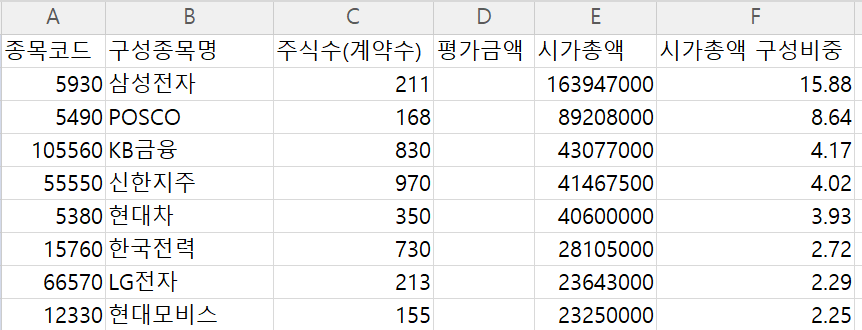

### 2-1-2. raw 데이터 수정

1. pdf파일의 etf코드가 'etf_base_info.pkl' 데이터프레임에서 '단축코드'에 대응하는 pdf 파일들만을 사용(사용 안하는 pdf파일들을 거르기 위해서)
2. 사용할 pdf 파일들의 시가총액 구성비중의 합이 100이 되는지 확인
3. 모든 pdf 파일들을 통합하여서 하나의 파일을 생성

#### 2-1-2-1. pdf 파일 필터링

- pdf파일의 etf코드가 'etf_base_info.pkl' 데이터프레임에서 '단축코드'에 대응하는 pdf 파일들만을 사용

In [14]:
# 사용하는 etf의 코드들을 리스트로 추출
import pandas as pd

df_etf_base_after = pd.read_pickle('/content/drive/MyDrive/snowball/data/After_raw/etf_base_info.pkl')
etf_code_list = list(df_etf_base_after['단축코드'])
etf_code_list[:5]

[445690, 442260, 159800, 361580, 285000]

In [16]:
# pdf 파일들의 제목들을 확인
import os

path_dir = '/content/drive/MyDrive/snowball/data/PDF_files' # pdf 파일들이 저장되어 있는 경로 입력
file_list = os.listdir(path_dir) # pdf파일 경로에 있는 모든 pdf 파일들 명을 file_list로 저장
file_list[:5]

['102960_20160201.csv',
 '102960_20160302.csv',
 '102960_20160401.csv',
 '102960_20160502.csv',
 '102960_20160601.csv']

In [20]:
# pdf파일의 etf코드가 'etf_base_info.pkl' 데이터프레임에서 '단축코드'에 대응하는 pdf 파일들만을 거름
pdf_file_list = list() # 걸러진(사용할) pdf 파일들의 파일명들을 담을 리스트
for pdf_file in file_list: # PDF_files 폴더안에 있는 모든 pdf 파일들에 대해서 적용
  pdf_file_code = int(pdf_file.split('_')[0]) # etf 코드를 추출
  if pdf_file_code in etf_code_list: # 추출한 etf 코드가 기준을 만족하면
    pdf_file_list.append(pdf_file) # 해당 리스트에 파일명을 추가
  else:
    pass


In [23]:
pdf_file_list[-10:]

['331910_20220701.csv',
 '331910_20220602.csv',
 '331910_20220801.csv',
 '331910_20220901.csv',
 '331910_20221101.csv',
 '331910_20221004.csv',
 '331910_20221201.csv',
 '331910_20230102.csv',
 '331910_20230201.csv',
 '331910_20230302.csv']

#### 2-1-2-2. pdf파일들 확인

- 사용할 pdf 파일들의 시가총액 구성비중의 합이 100이 되는지 확인

In [25]:
import pandas as pd
def check_pdf_file(filepath):
  df_pdf = pd.read_csv(filepath, encoding='cp949')
  print(df_pdf.info())

check_pdf_file('/content/drive/MyDrive/snowball/data/PDF_files/331910_20220701.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   종목코드       101 non-null    object 
 1   구성종목명      101 non-null    object 
 2   주식수(계약수)   100 non-null    float64
 3   평가금액       100 non-null    float64
 4   시가총액       101 non-null    int64  
 5   시가총액 구성비중  101 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.9+ KB
None


## 2-2. 제무제표 데이터 설명

### 2-2-1. 재무제표 원본 데이터 설명

- 재무 상태표의 경우
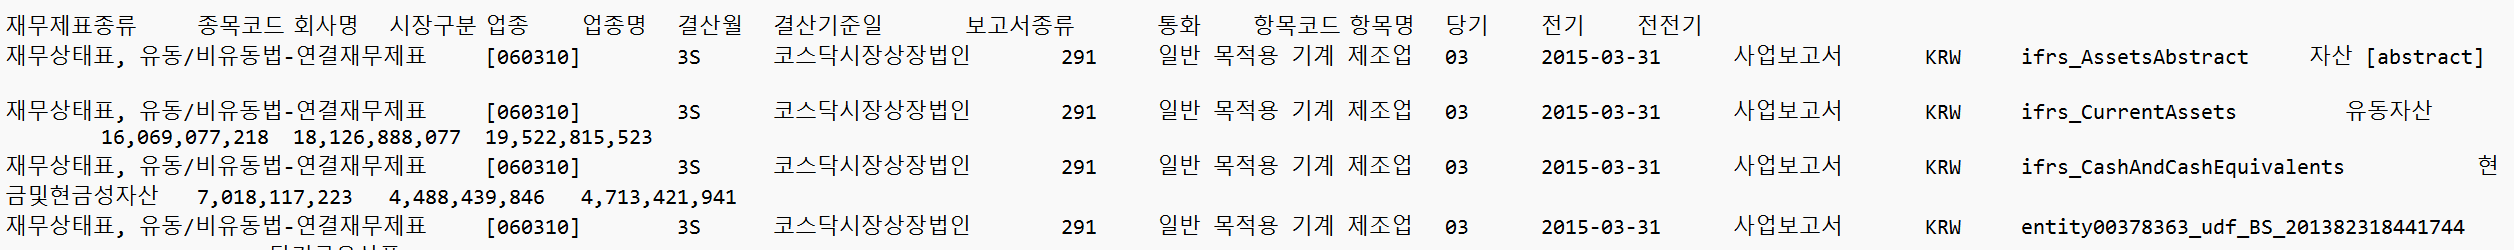
- 손익계산서의 경우
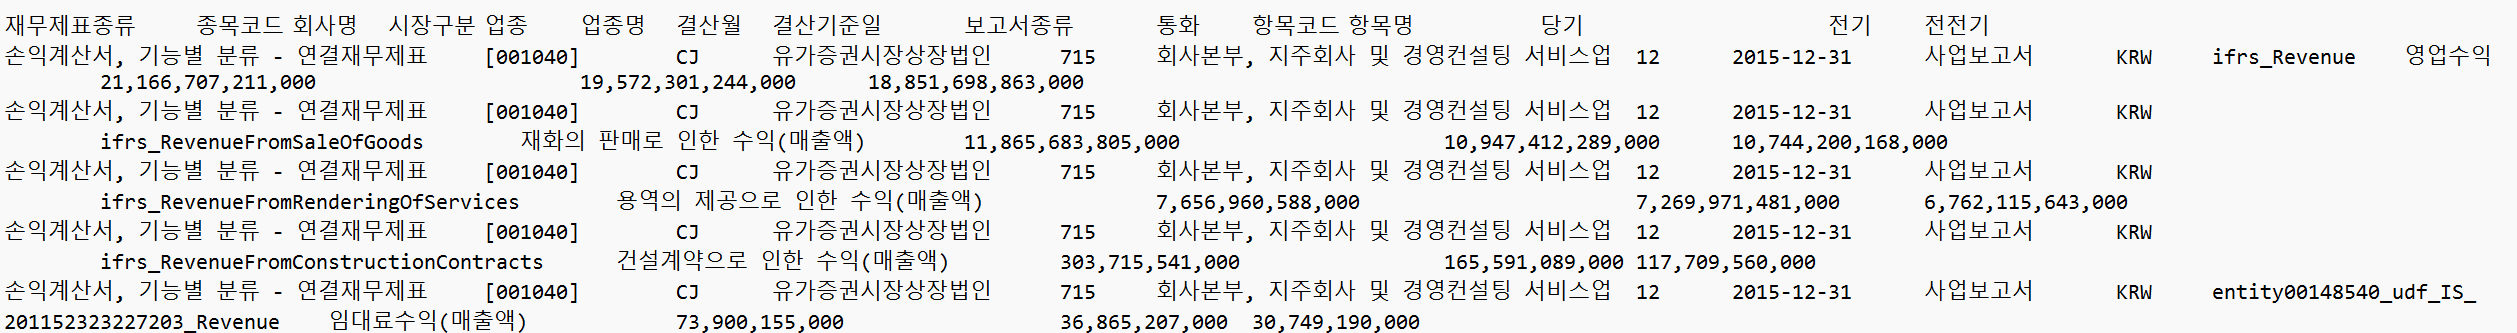
- txt 파일들이어서 추후 전처리에 애로사항이 생김으로, 데이터프레임화를 하여서 병합이 필요

### 2-2-2. 재무제표 데이터 데이터프레임화

## 2-4. ETF 가격 데이터 설명

# 3.  데이터 탐색 보고서

# 4. 데이터 품질 보고서